# Assignment 5 - Machine Learning in R

### Author: Maria Spaeth
### Submission date: 07/24/2025
### Environment: see environment.yml file
### Description:
This is for BSGP7030 where we look at how to use do machine learning in R. 
We followed the "Your First Machine Learning Project in R Step-by-Step" tutorial by Jason Brownlee. (We followed the "Your First Machine Learning Project in R Step-by-Step" tutorial by Jason Brownlee. (We followed the "Your First Machine Learning Project in R Step-by-Step" tutorial by Jason Brownlee. (https://machinelearningmastery.com/machine-learning-in-r-step-by-step/).
In this tutorial we learned how to install R packages, load datasets to R, and how to summarize the 
dataset with statistics and visualization. We also learned how to evaluate different algorithms for 
machine learning. To do this we split our dataset (iris.csv) into teaching and testing groups. 
We then made some predictions with the algorithm that we determined was the best for our uses.

---
---

## 1. Downloading Installing and Starting R

In [6]:
# We need to open the package we want to use for this tutorial

library(caret)
library(kernlab)
library(ggplot2)
library(ellipse)
library(randomForest)

## 2. Load the Data

In [7]:
# R has the iris dataset built into the system so we don't have to download
# the .csv file here

# attach the iris dataset to the environment
data(iris)
# rename the dataset
dataset <- iris

In [8]:
# Here we are making a validation dataset that we will be able to test our machine learning with
# by splitting our data into 80% learning and 20% validation

# create a list of 80% of the rows in the original dataset we can use for training
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)
# select 20% of the data for validation
validation <- dataset[-validation_index,]
# use the remaining 80% of data to training and testing the models
dataset <- dataset[validation_index,]

## 3. Summarize Dataset

In [9]:
#this shows us the dimensions of the dataset
dim(dataset)

[1] 120   5

In [10]:
# This will list the type for each attribute in our dataset
sapply(dataset,class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

In [11]:
# Looking at the dataset
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [12]:
# This lists the levels for the class
levels(dataset$Species)

[1] "setosa"     "versicolor" "virginica"

In [13]:
# Summarizing the class dataset (showing number of instances as an absolute count and a percentage)
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

,freq,percentage
setosa,40,33.33333
versicolor,40,33.33333
virginica,40,33.33333


In [14]:
# showing basic statistics about the dataset
summary(dataset)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.400   Min.   :2.200   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.300   Median :1.300  
 Mean   :5.861   Mean   :3.075   Mean   :3.747   Mean   :1.204  
 3rd Qu.:6.500   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :40  
 versicolor:40  
 virginica :40  
                
                
                

## Visualise Dataset

In [15]:
# starting with a univariate plot (looking at one variable at a time)

# split input and output
x <- dataset[,1:4]
y <- dataset[,5]

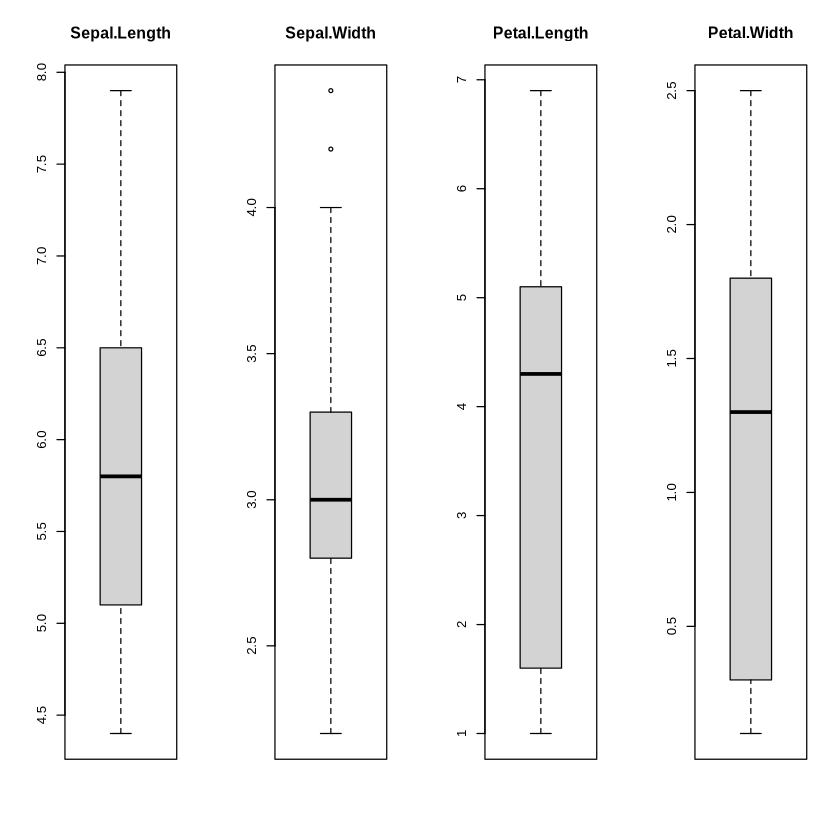

In [16]:
# boxplot for each attribute on one image
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}

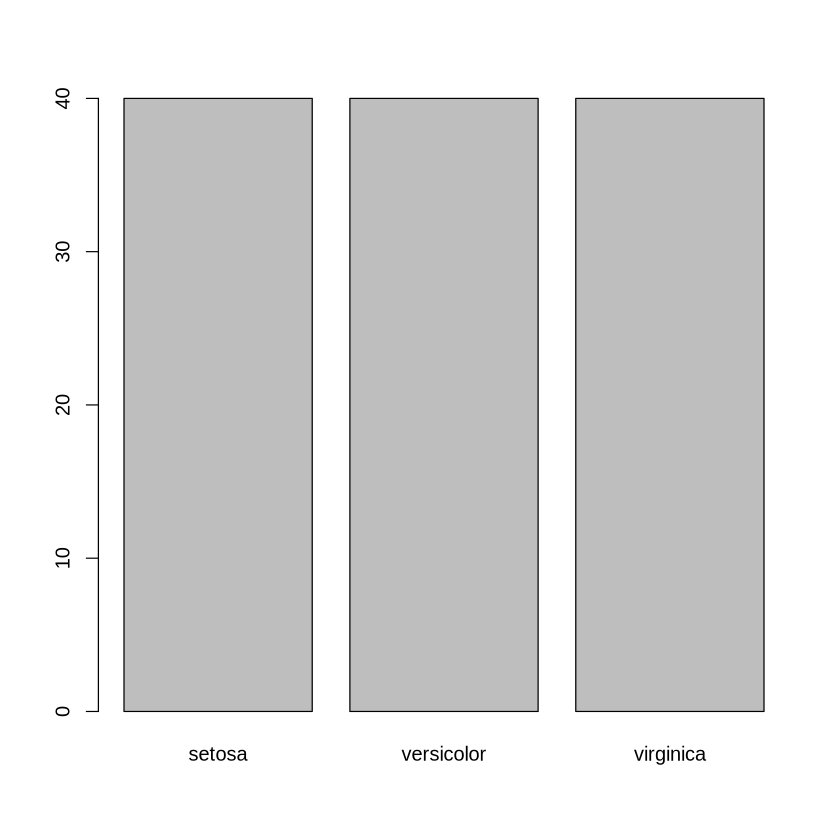

In [17]:
# barplot for class breakdown
plot(y)

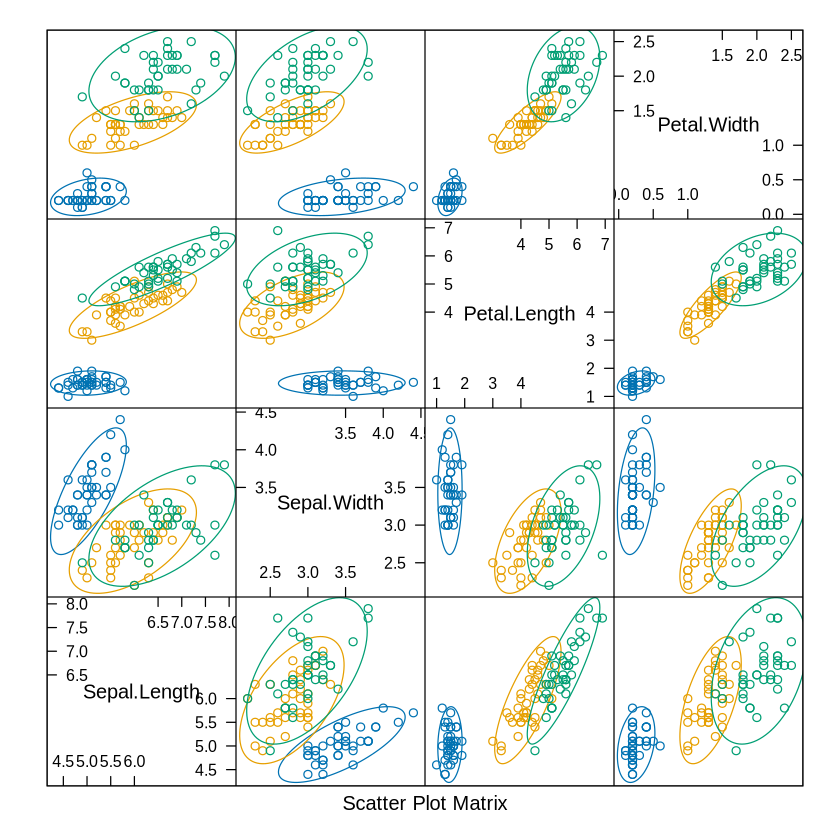

In [18]:
# Looking at multivariate plots
# scatterplot matrix
featurePlot(x=x, y=y, plot="ellipse")

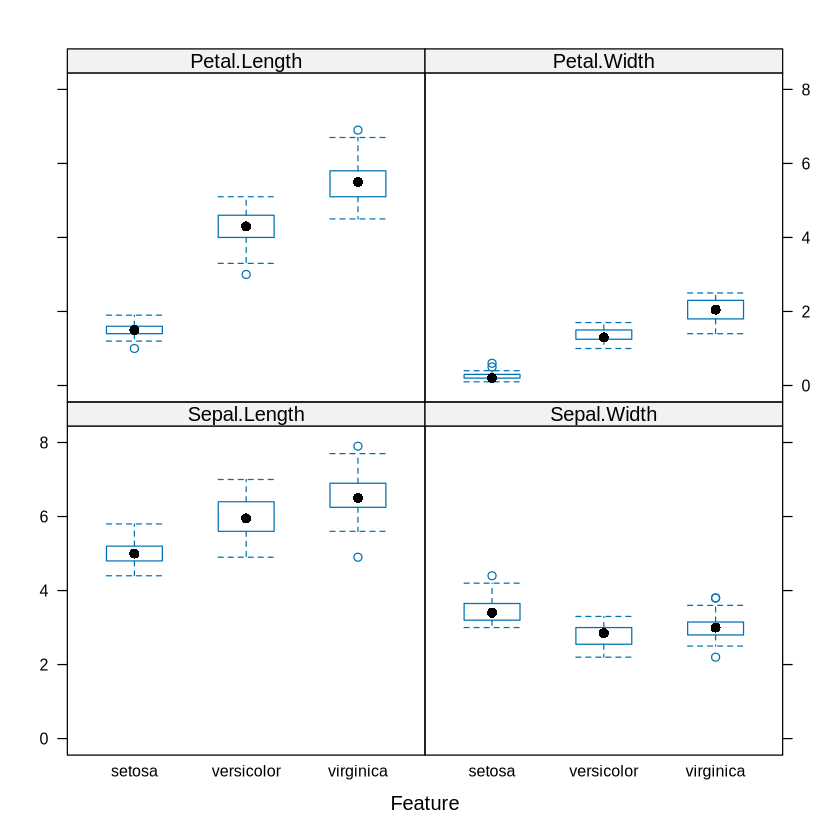

In [19]:
# box and whisker plots for each attribute
featurePlot(x=x, y=y, plot="box")

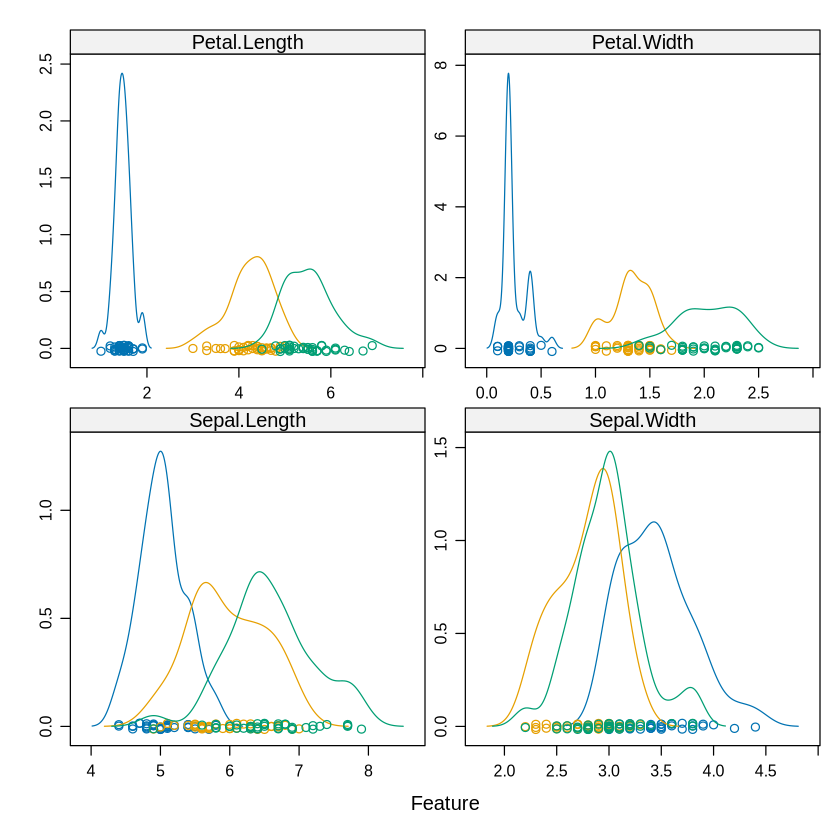

In [20]:
# density plots for each attribute by class value
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

## 5. Evaluate Some Algorithms

In [21]:
# We will train on 9 samples and test one 1
# Run algorithms using 10-fold cross validation
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

In [22]:
# the different algorithms we are using

# a) linear algorithms
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)
# b) nonlinear algorithms
# CART
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)
# kNN
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)
# c) advanced algorithms
# SVM
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)
# Random Forest
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

In [23]:
# determining which model is the best model for our machine learning
# summarize accuracy of models
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean 3rd Qu. Max. NA's
lda  0.8333333 1.0000000 1.0000000 0.9750000       1    1    0
cart 0.8333333 0.9166667 0.9583333 0.9416667       1    1    0
knn  0.9166667 0.9375000 1.0000000 0.9750000       1    1    0
svm  0.8333333 0.8750000 1.0000000 0.9500000       1    1    0
rf   0.8333333 0.9375000 1.0000000 0.9583333       1    1    0

Kappa 
      Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
lda  0.750 1.00000 1.0000 0.9625       1    1    0
cart 0.750 0.87500 0.9375 0.9125       1    1    0
knn  0.875 0.90625 1.0000 0.9625       1    1    0
svm  0.750 0.81250 1.0000 0.9250       1    1    0
rf   0.750 0.90625 1.0000 0.9375       1    1    0


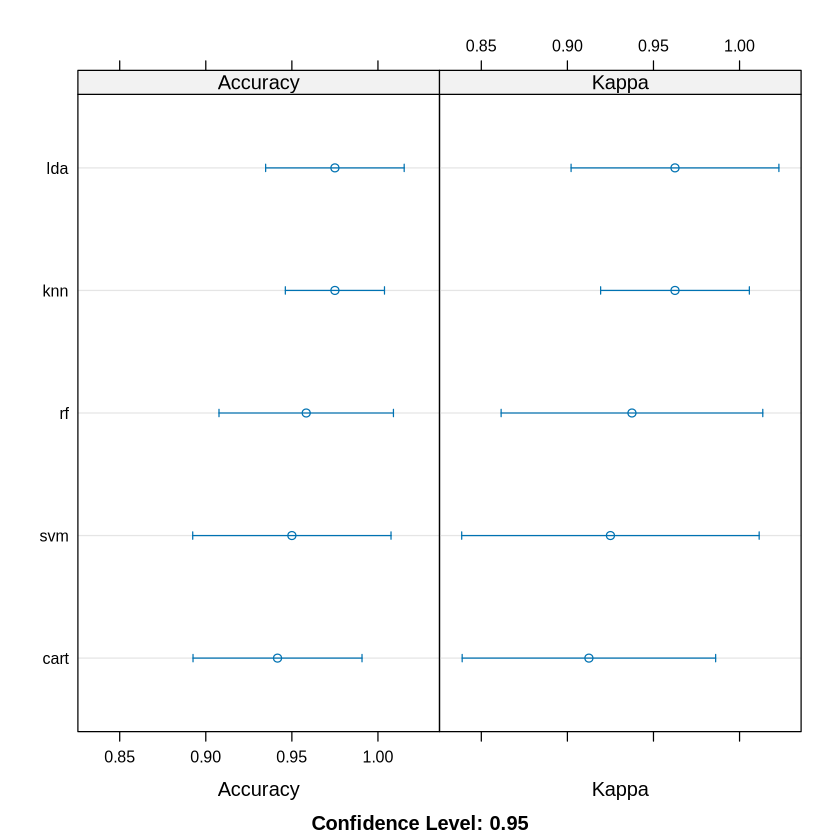

In [24]:
# visualizing our results from the line above
dotplot(results)

In [25]:
# seeing the accuracy of the model that so far seems best suited for our uses
print(fit.lda)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy  Kappa 
  0.975     0.9625



## 6. Make Predictions

In [26]:
# testing our model (LDA or lda)
# estimate skill of LDA on the validation dataset
predictions <- predict(fit.lda, validation)
confusionMatrix(predictions, validation$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0          9         0
  virginica       0          1        10

Overall Statistics
                                          
               Accuracy : 0.9667          
                 95% CI : (0.8278, 0.9992)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 2.963e-13       
                                          
                  Kappa : 0.95            
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9000           1.0000
Specificity                 1.0000            1.0000           0.9500
Pos Pred Value              1.0000            1.0000           0.9091
Neg Pred Value              1.0000            0.9524           1.0000
P